<a href="https://colab.research.google.com/github/crislanecas/estudos_python/blob/main/Alura%26OracleNextEducation/06_Introdu%C3%A7%C3%A3o_Machine_Learning_Aula_3_e_4_Baseline_e_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importa a biblioteca Pandas.
import pandas as pd

# Importando os dados

In [ ]:
# Importa os dados que estão na URL.
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [ ]:
# Mostra as 5 primeiras linhas do dataframe.
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


# Ajustando os dados

In [ ]:
# Cria um dicionários para fazer a correspondencia de valores, conforme definido abaixo.
renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

# Renomeia as colunas conforme dicionário criado acima.
dados = dados.rename(columns = renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
# Como a coluna nao_finalizado pode gerar confusões, afinal 0 seriam os projetos finalizados e 1 os não finalizados.
# Podemos organizar as nossas features com mais clareza de forma a evitar erros no desenvolvimento do projeto.
# Cria um dicionário para fazer a troca dos valores, conforme abaixo.
troca = {
    0 : 1,
    1 : 0
}

# Cria uma nova coluna chamada finalizados, e troca os valores 0 e 1.
# Invertendo a função deles nesta coluna. Por fim, mapearemos essa troca de valores usando map(troca).
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


# Analisando os dados visualmente

In [ ]:
# Importa a biblioteca Seaborn.
import seaborn as sns

<Axes: xlabel='horas_esperadas', ylabel='preco'>

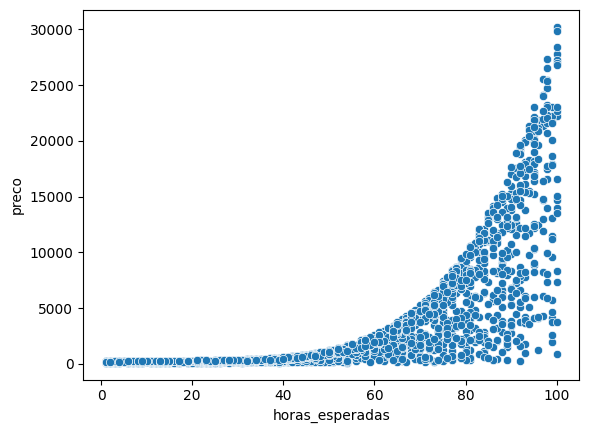

In [ ]:
# Plot uma gráfico de disperção.
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

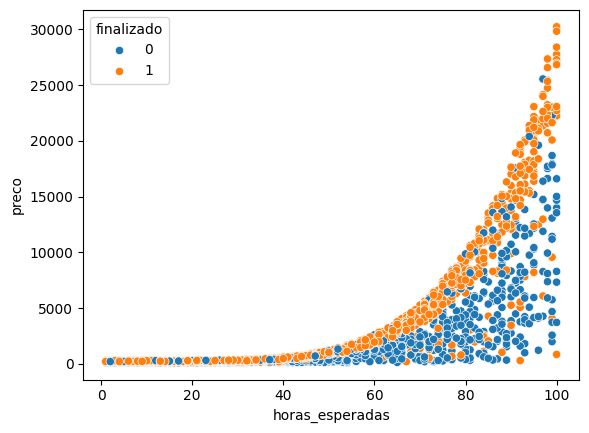

In [ ]:
# Plot uma gráfico de disperção com 3 dimensões.
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

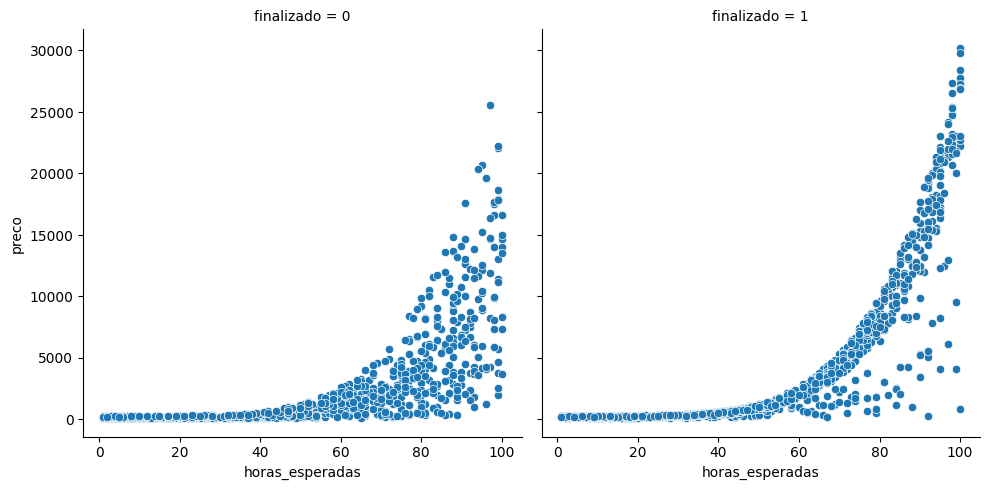

In [ ]:
# Plot uma gráfico de disperção, separado de acordo com a coluna finalizado.
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

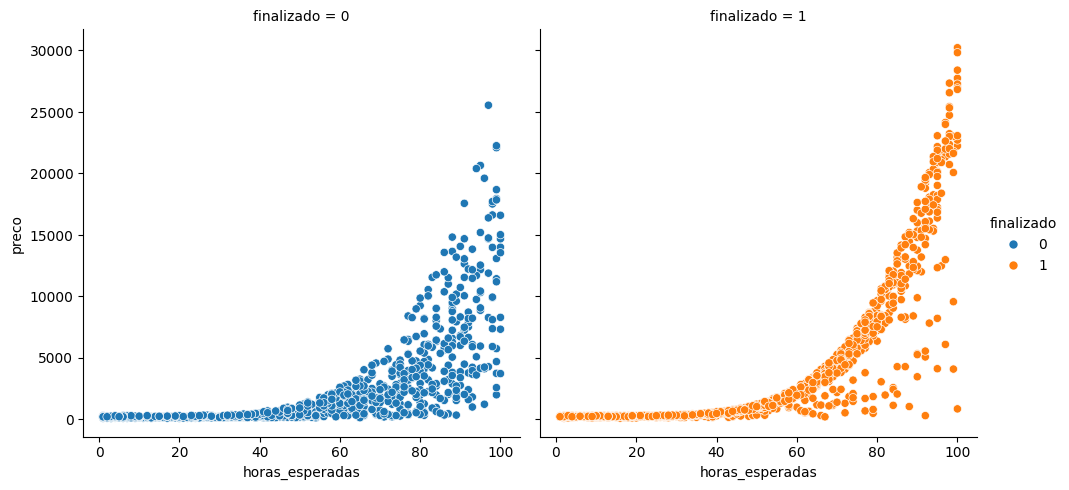

In [ ]:
# Plot uma gráfico de disperção, separado de acordo com a coluna finalizado e diferenciando pela cor.
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

# Estimando valores com método LinearSVC
Esse estimador é capaz de encontrar relacionamentos lineares entre as informações que passamos.

In [ ]:
# Importar as ferramentas da biblioteca scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
# Importa a biblioteca Numpy.
import numpy as np

In [ ]:
# Separa os dados entre x e y, sendo x as variáveis independentes e y dependente que queremos estimar.
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [ ]:
# Como o método LinearSVC() e a função train_test_split() usam Numpy para gerar números aleatórios, podemos configurar o método do Numpy que irá valer para os dois.
SEED = 10
np.random.seed(SEED)

# Utiliza a função train_test_split para retornar uma lista de quatro itens que serão criados com os elementos da listas acimas x e y.
# O parâmetro test_size informa que 25% serão selecionados para a realização de testes do modelo, e o restante será para treino (75%).
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Utiliza a função LinearSVC() para instanciar o modelo.
modelo = LinearSVC()

# Utiliza o método fit() para estimar o modelo com os dados passados como parâmetro.
modelo.fit(treino_x, treino_y)

# Cria uma previsão utilizando o método predict().
previsoes = modelo.predict(teste_x)

# Calcula a acurácia do modelo.
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.96%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Criando um algoritimo de baseline
O algoritimo de baseline ser de base de comparação com o modelo.

In [ ]:
# Cria uma matriz com 540 elementos com valor todos iguais.
previsoes_de_base = np.ones(540)

# Calcula a acurária da previsão de base.
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritimo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritimo de baseline foi 52.59%


## Análise gráfica


<Axes: xlabel='horas_esperadas', ylabel='preco'>

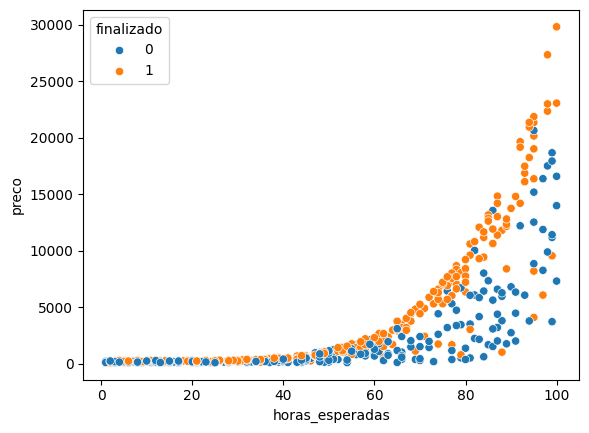

In [ ]:
# Plot uma gráfico de disperção com 3 dimensõe, usando os dados de teste.
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

# Criando uma matriz com o conjuto de teste passo-a-passo

In [ ]:
# Obtem o valores mínimos e máximo de cada variável.
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 29820


In [ ]:
# Define a quantidade pixels em cada dimensão para cada eixo.
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [ ]:
# Utiliza o método np.meshgrid() para criar um grid entre os dois eixos, multiplicando as opções de acordo com as diferentes possibilidade de custo de projeto e tempo de execução.
# Recebe como parâmetros o eixo_x e eixo_y, e devolve o conteúdo é xx e yy.
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.00000e+00, 1.00000e+02],
       [1.99000e+00, 1.00000e+02],
       [2.98000e+00, 1.00000e+02],
       ...,
       [9.70300e+01, 2.95228e+04],
       [9.80200e+01, 2.95228e+04],
       [9.90100e+01, 2.95228e+04]])

In [ ]:
# Faz as previsões com a função predict() para todos os pontos.
Z = modelo.predict(pontos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
# Mostra a quantidade de linhas.
Z.shape

(10000,)

In [ ]:
# Mostra a quantidade de linhas e colunas.
xx.shape

(100, 100)

In [ ]:
# Redimensiona Z (array de 10000) usando a função reshape() de acordo com xx.
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

## Análise gráfica

In [ ]:
# Importa a biblioteca Matplotlib.
import matplotlib.pyplot as plt

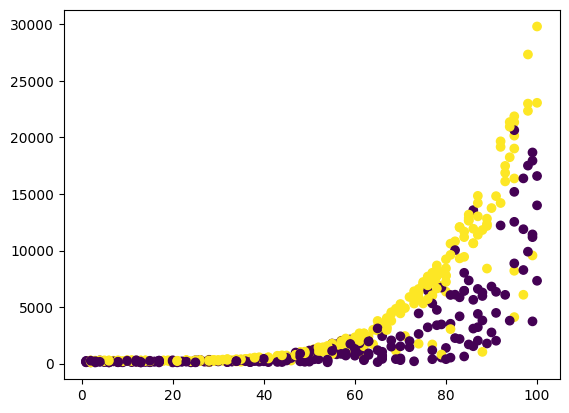

In [ ]:
# Plota um gráfico de dispersão usando os dados de teste.
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)

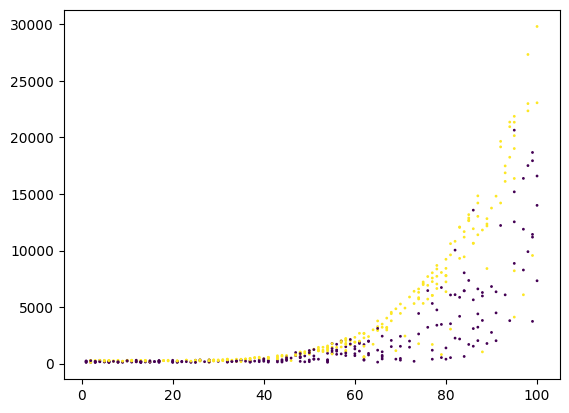

In [ ]:
# Plota um gráfico de dispersão usando os dados de teste, igual acima, mas definindo o tamanho menor para os pontos.
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

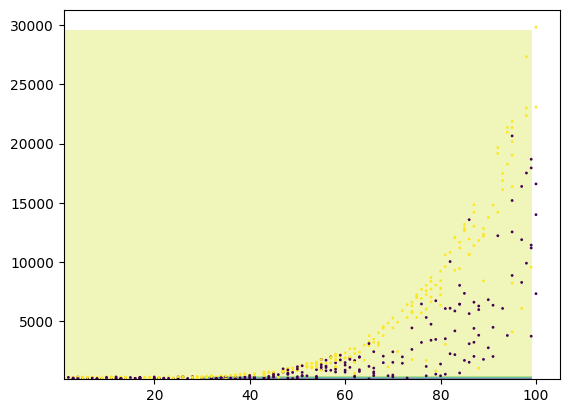

In [ ]:
# Plota um gráfico de dispersão usando os dados de teste.
# Utiliza plt.contourf() para desenhar a classificação e visualização da curva que separa as duas classificações do algoritmo e nos permite visualizar a borda de decisão.
# O parâmetro alpha=0.3, define a transparência.
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# Estimando valores com método SVC
Esse estimador é capaz de encontrar relacionamentos não lineares entre as informações que passamos.

In [ ]:
# Importar a ferramenta para estimar valores da biblioteca scikit-learn.
from sklearn.svm import SVC

In [ ]:
# Define o SEED para gerar números aleatórios para função train_test_split() e SVC().
SEED = 5
np.random.seed(SEED)

# Separa os dados em treino e teste.
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Utiliza a função SVC() para instanciar o modelo.
modelo = SVC(gamma='auto')

# Utiliza o método fit() para estimar o modelo com os dados passados como parâmetro.
modelo.fit(treino_x, treino_y)

# Cria uma previsão utilizando o método predict().
previsoes = modelo.predict(teste_x)

# Calcula a acurácia do modelo.
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


In [ ]:
# Cria uma matriz com o conjuntos de teste.

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Análise gráfica

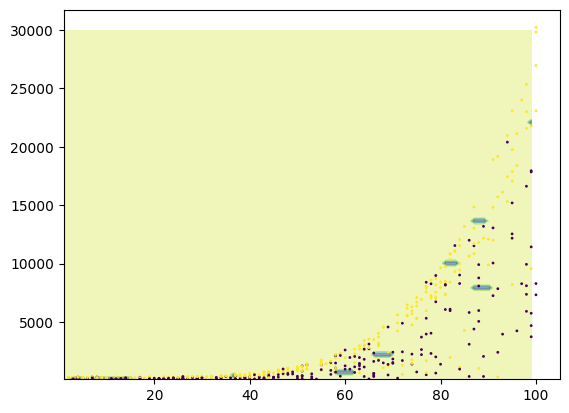

In [ ]:
# Plota um gráfico de dispersão usando os dados de teste, utiliza plt.contourf() para visualizar a borda de decisão.
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# Estimando valores com método SVC e Reescalonando os dados
Escalas distintas em features causam um desbalanço no algoritmo. Uma alternativa para solucionarmos esse problema é reescalarmos para uma faixa similar. Utilizando o escalador padrão do Sklearn, o StandardScaler, que é uma fase de pré-processamento e padronização de valores.

In [ ]:
# Importar a ferramenta para pré-processamento da biblioteca scikit-learn.
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define o SEED para gerar números aleatórios para função train_test_split() e SVC().
SEED = 5
np.random.seed(SEED)

# Separa os dados em treino e teste.
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Utiliza o StandardScaler() para reescalonar os dados para uma faixa similar.
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

# Utiliza a função SVC() para instanciar o modelo.
modelo = SVC(gamma='auto')

# Utiliza o método fit() para estimar o modelo com os dados passados como parâmetro.
modelo.fit(treino_x, treino_y)

# Cria uma previsão utilizando o método predict().
previsoes = modelo.predict(teste_x)

# Calcula a acurácia do modelo.
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


In [ ]:
# Cria uma nova matriz com o conjuntos de teste.

# Seleciona todas os registros da coluna 0.
data_x = teste_x[:,0]
# Seleciona todas os registros da coluna 1.
data_y = teste_x[:,1]

# Obtem o valores mínimos e máximo de cada variável, agora reescalonados e separados arrays distintos.
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

## Análise gráfica

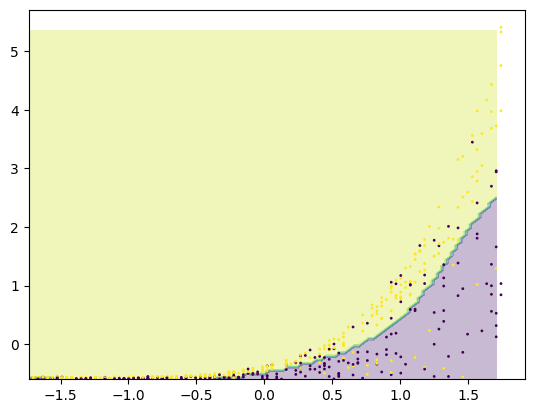

In [ ]:
# Plota um gráfico de dispersão usando os dados de teste, utiliza plt.contourf() para visualizar a borda de decisão.
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)